In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('') # Enter the address of the 'preprocessed_data.csv'
df

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_id,rating,title,directedBy,starring,avgRating,imdbId
0,0,5.0,2.0,3.0,2.5,6.5,1,5.0,Toy Story (1995),John Lasseter,"Tim Allen, Tom Hanks, Don Rickles, Jim Varney,...",3.89146,114709
1,0,5.0,2.0,3.0,2.5,6.5,5265,4.0,Death to Smoochy (2002),Danny DeVito,"Danny DeVito, Edward Norton, Robin Williams, C...",3.15655,266452
2,0,5.0,2.0,3.0,2.5,6.5,5258,3.0,George Washington (2000),David Gordon Green,"Curtis Cotton III, Donald Holden, Damian Jewan...",3.58985,262432
3,0,5.0,2.0,3.0,2.5,6.5,5256,4.0,Stolen Summer (2002),Pete Jones,"Brian Dennehy, Kevin Pollak, Aidan Quinn, Bonn...",2.98246,286162
4,0,5.0,2.0,3.0,2.5,6.5,97752,3.5,Cloud Atlas (2012),"Tom Tykwer, Andy Wachowski, Lana Wachowski","Tom Hanks, Halle Berry, Jim Broadbent, Hugo We...",3.56958,1371111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067063,1819,6.5,6.5,2.5,6.5,2.0,8665,4.0,"Bourne Supremacy, The (2004)",Paul Greengrass,"Matt Damon, Franka Potente, Brian Cox, Julia S...",3.85346,372183
1067064,1819,6.5,6.5,2.5,6.5,2.0,357,0.5,Four Weddings and a Funeral (1994),Mike Newell,"Hugh Grant, John Hannah, Kristin Scott Thomas,...",3.64227,109831
1067065,1819,6.5,6.5,2.5,6.5,2.0,39,4.5,Clueless (1995),Amy Heckerling,"Alicia Silverstone, Paul Rudd, Stacey Dash, Br...",3.42428,112697
1067066,1819,6.5,6.5,2.5,6.5,2.0,5872,4.0,Die Another Day (2002),Lee Tamahori,"Pierce Brosnan, Toby Stephens, Halle Berry, Ro...",3.09111,246460


In [ ]:
df2 = df.copy()
df2 = df2.drop_duplicates(subset = 'userid')
df3 = df2.copy()

df2 = df2[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]
features = df2.reset_index().drop('index', axis=1)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

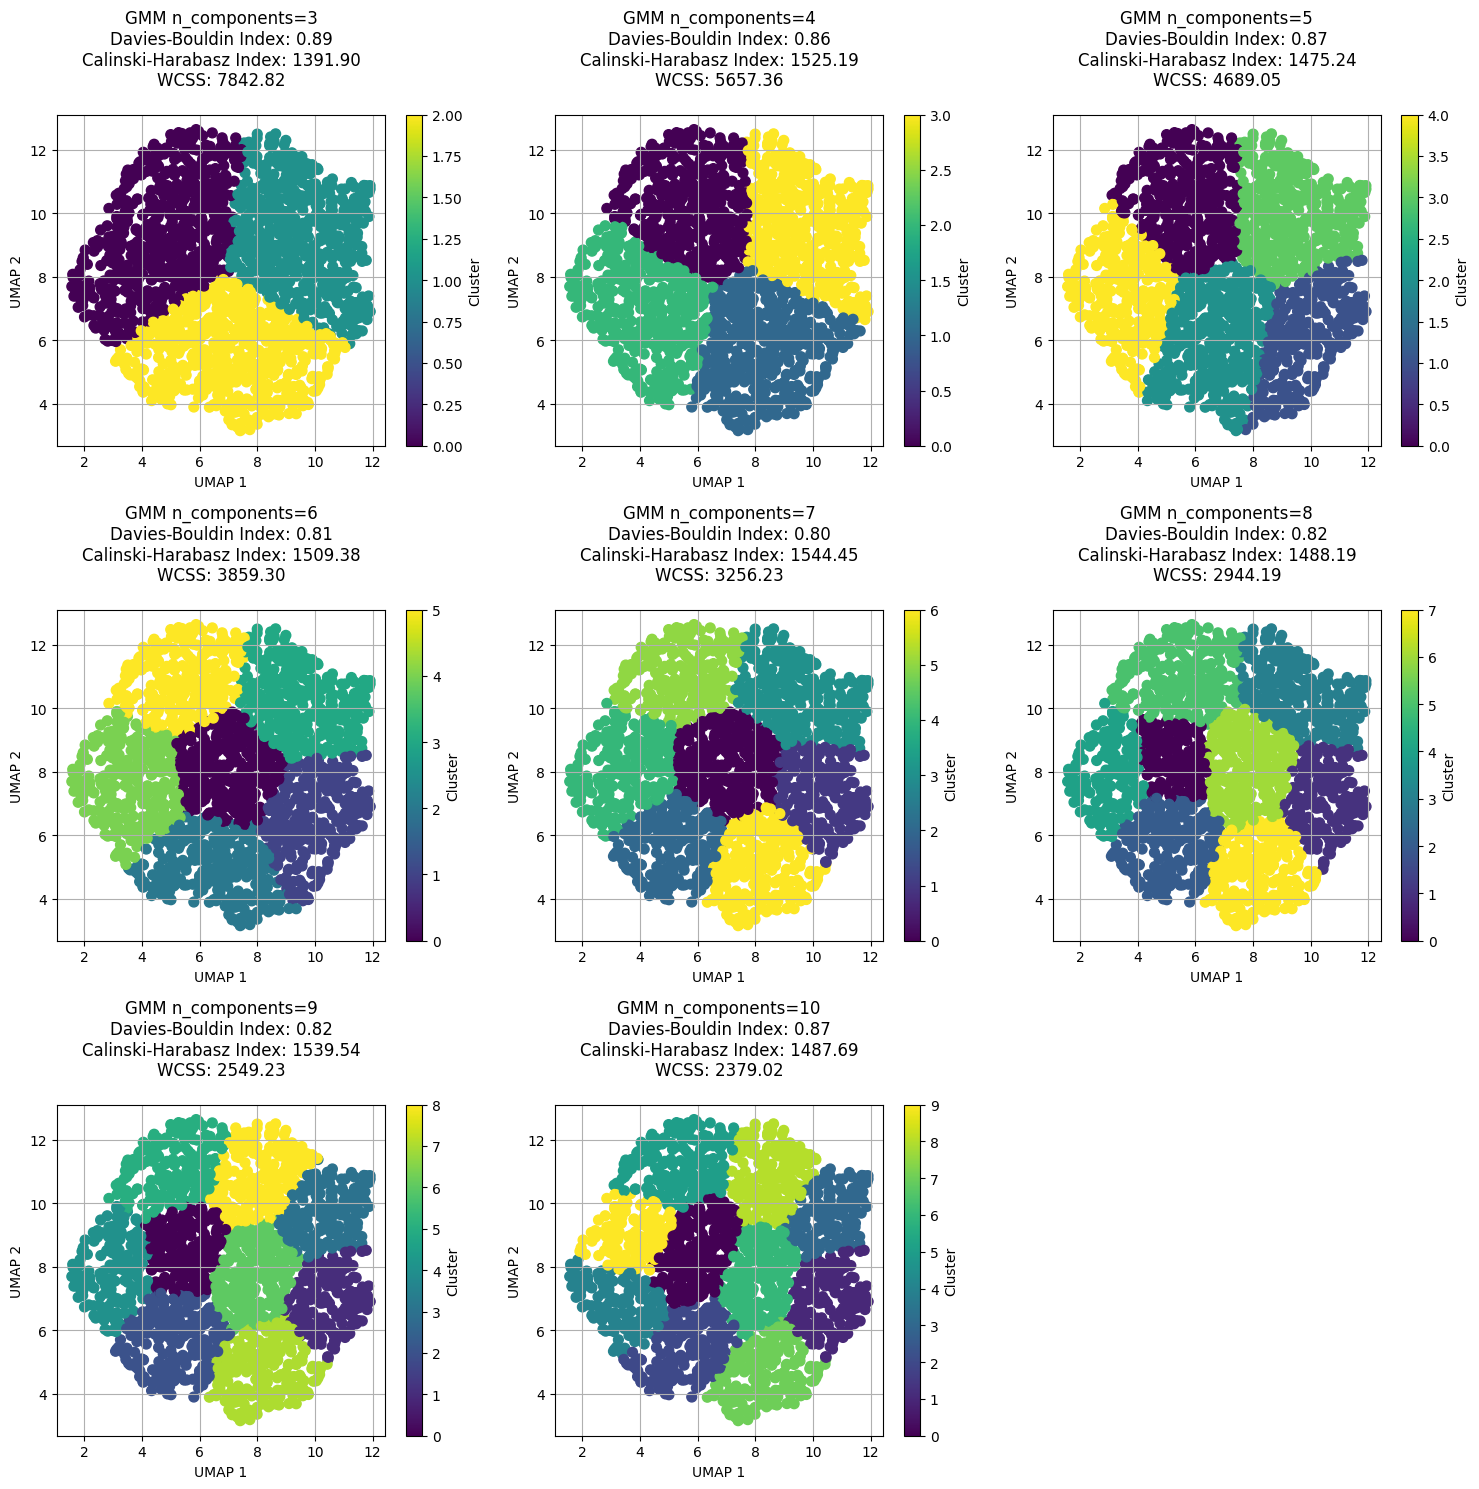

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import pairwise_distances_argmin_min
import umap

features = df2[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]

scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)

umap_params = {'n_neighbors': 30, 'min_dist': 0.5}
gmm_components = list(range(3, 11))

num_plots = len(gmm_components)
num_cols = 3
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))

if num_rows == 1 or num_cols == 1:
    axes = np.array(axes).reshape(num_rows, num_cols)

for i, n_components in enumerate(gmm_components):
    umap_model = umap.UMAP(
        n_neighbors=umap_params['n_neighbors'],
        min_dist=umap_params['min_dist'],
        n_components=2,
        random_state=42
    )
    umap_embeddings = umap_model.fit_transform(transformed_features)

    gmm = GaussianMixture(n_components=n_components, random_state=42)
    clusters = gmm.fit_predict(umap_embeddings)

    # Davies-Bouldin Index
    try:
        if len(set(clusters)) > 1:
            db_index = davies_bouldin_score(umap_embeddings, clusters)
        else:
            db_index = -1
    except Exception as e:
        db_index = -1
        print(f"Error calculating Davies-Bouldin index: {e}")

    # Calinski-Harabasz Index
    try:
        if len(set(clusters)) > 1:
            ch_index = calinski_harabasz_score(umap_embeddings, clusters)
        else:
            ch_index = -1
    except Exception as e:
        ch_index = -1
        print(f"Error calculating Calinski-Harabasz index: {e}")

    # Within-Cluster Sum of Squares (WCSS)
    try:
        wcss = np.sum([np.sum((umap_embeddings[clusters == k] - gmm.means_[k])**2) for k in range(n_components)])
    except Exception as e:
        wcss = -1
        print(f"Error calculating WCSS: {e}")

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    scatter = ax.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=clusters, cmap='viridis', s=50)
    ax.set_title(
        f'GMM n_components={n_components}\n'
        f'Davies-Bouldin Index: {db_index:.2f}\n'
        f'Calinski-Harabasz Index: {ch_index:.2f}\n'
        f'WCSS: {wcss:.2f}\n'
    )
    ax.set_xlabel('UMAP 1')
    ax.set_ylabel('UMAP 2')
    ax.grid(True)
    fig.colorbar(scatter, ax=ax, label='Cluster')

if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridd

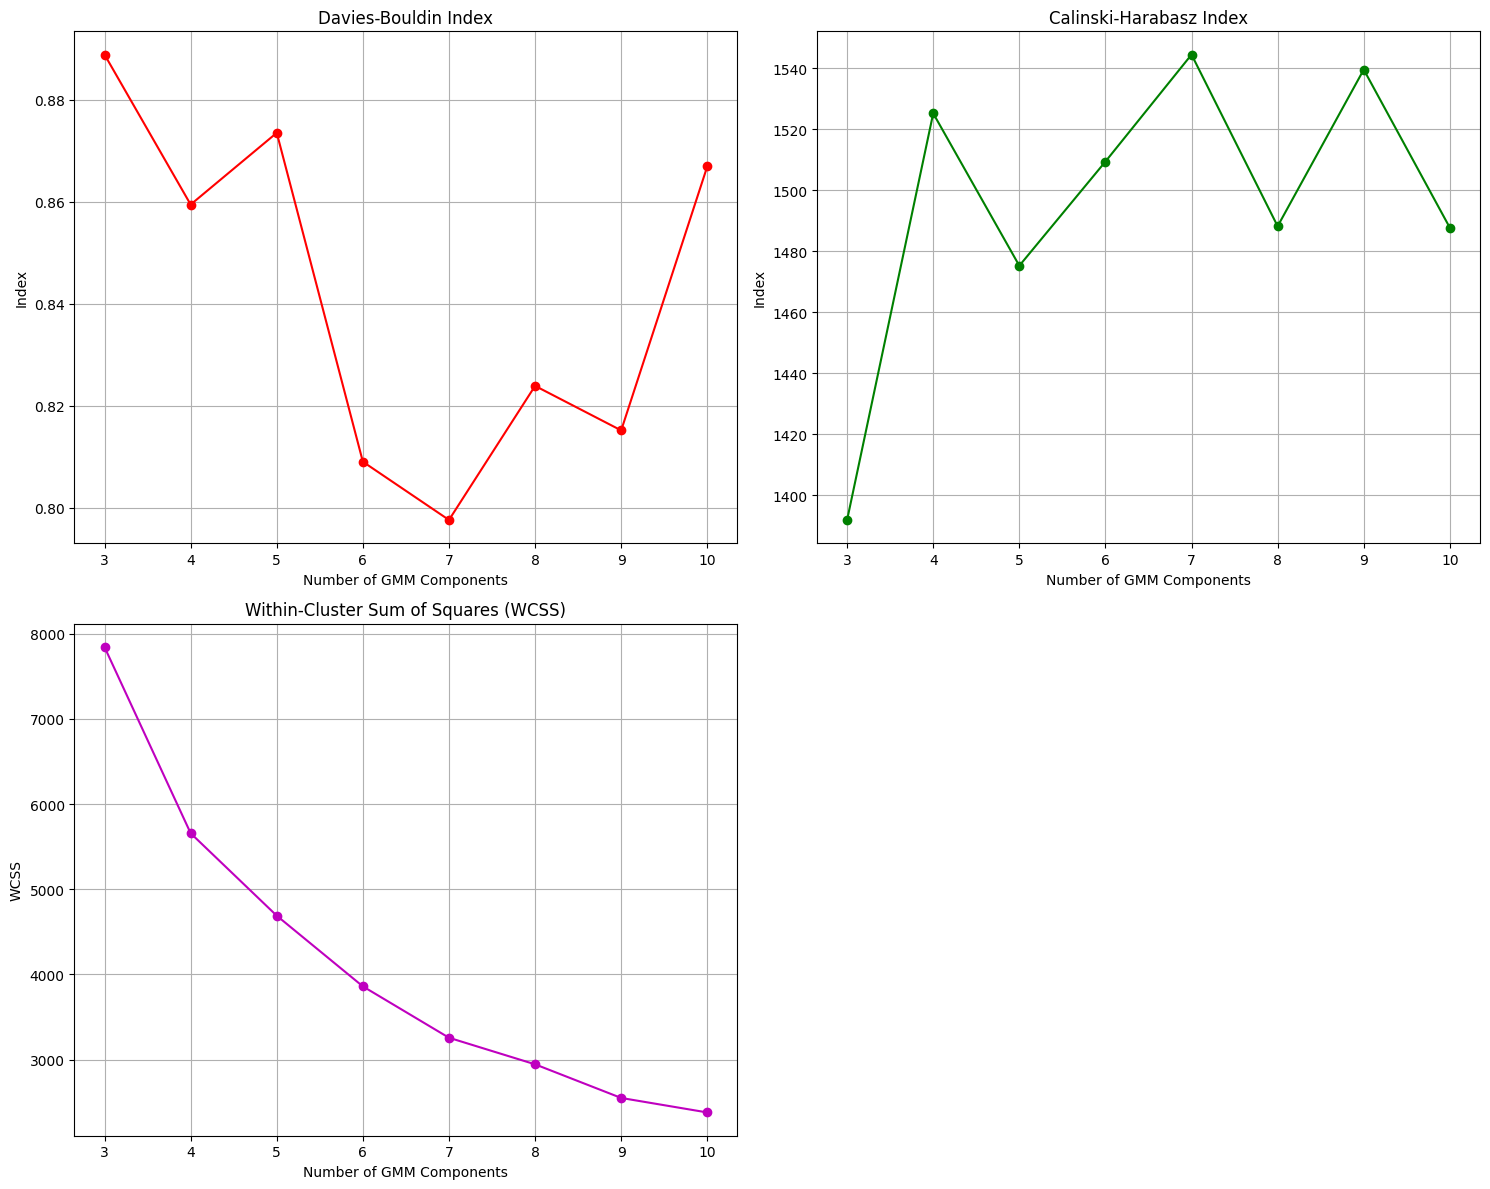

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import umap

features = df2[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]

scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)

umap_params = {'n_neighbors': 30, 'min_dist': 0.5}

gmm_components = list(range(3, 11))

db_indices = []
ch_indices = []
wcss_values = []

for n_components in gmm_components:
    umap_model = umap.UMAP(
        n_neighbors=umap_params['n_neighbors'],
        min_dist=umap_params['min_dist'],
        n_components=2,
        random_state=42
    )
    umap_embeddings = umap_model.fit_transform(transformed_features)

    gmm = GaussianMixture(n_components=n_components, random_state=42)
    clusters = gmm.fit_predict(umap_embeddings)

    # Davies-Bouldin Index
    try:
        if len(set(clusters)) > 1:
            db_index = davies_bouldin_score(umap_embeddings, clusters)
        else:
            db_index = -1
    except Exception as e:
        db_index = -1
        print(f"Error calculating Davies-Bouldin index: {e}")
    db_indices.append(db_index)

    # Calinski-Harabasz Index
    try:
        if len(set(clusters)) > 1:
            ch_index = calinski_harabasz_score(umap_embeddings, clusters)
        else:
            ch_index = -1
    except Exception as e:
        ch_index = -1
        print(f"Error calculating Calinski-Harabasz index: {e}")
    ch_indices.append(ch_index)

    # Within-Cluster Sum of Squares (WCSS)
    try:
        wcss = np.sum([np.sum((umap_embeddings[clusters == k] - gmm.means_[k])**2) for k in range(n_components)])
    except Exception as e:
        wcss = -1
        print(f"Error calculating WCSS: {e}")
    wcss_values.append(wcss)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0, 0].plot(gmm_components, db_indices, marker='o', linestyle='-', color='r')
axes[0, 0].set_title('Davies-Bouldin Index')
axes[0, 0].set_xlabel('Number of GMM Components')
axes[0, 0].set_ylabel('Index')
axes[0, 0].grid(True)

axes[0, 1].plot(gmm_components, ch_indices, marker='o', linestyle='-', color='g')
axes[0, 1].set_title('Calinski-Harabasz Index')
axes[0, 1].set_xlabel('Number of GMM Components')
axes[0, 1].set_ylabel('Index')
axes[0, 1].grid(True)

axes[1, 0].plot(gmm_components, wcss_values, marker='o', linestyle='-', color='m')
axes[1, 0].set_title('Within-Cluster Sum of Squares (WCSS)')
axes[1, 0].set_xlabel('Number of GMM Components')
axes[1, 0].set_ylabel('WCSS')
axes[1, 0].grid(True)


plt.tight_layout()
plt.show()


In [ ]:
df3 = df3[['userid', 'openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


      UMAP_1    UMAP_2  GMM_Cluster
0   8.999709  4.669909            6
1   4.363178  8.225785            4
2  11.105899  8.925275            3
3   6.482596  6.713795            0
4   8.901539  7.924627            1


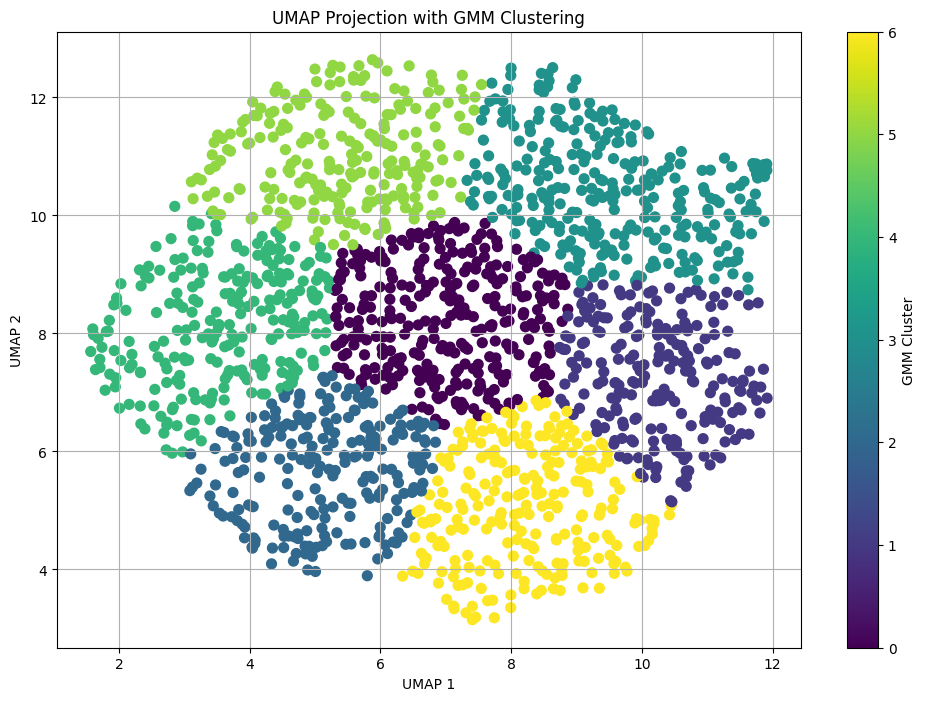

In [ ]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

features = df2[['openness', 'agreeableness', 'emotional_stability', 'conscientiousness', 'extraversion']]

scaler = StandardScaler()
transformed_features = scaler.fit_transform(features)

umap_params = {'n_neighbors': 30, 'min_dist': 0.5}

umap_model = umap.UMAP(
    n_neighbors=umap_params['n_neighbors'],
    min_dist=umap_params['min_dist'],
    n_components=2,
    random_state=42
)
umap_embeddings = umap_model.fit_transform(transformed_features)

n_components = 7
gmm = GaussianMixture(n_components=n_components, random_state=42)
clusters = gmm.fit_predict(umap_embeddings)

df3 = pd.DataFrame(umap_embeddings, columns=['UMAP_1', 'UMAP_2'])
df3['GMM_Cluster'] = clusters

print(df3.head())
df3.to_csv('/content/drive/MyDrive/24-2 EDA Project/movie_reviews_with_clusters.csv', index=False)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df3['UMAP_1'], df3['UMAP_2'], c=df3['GMM_Cluster'], cmap='viridis', s=50)
plt.colorbar(scatter, label='GMM Cluster')
plt.title('UMAP Projection with GMM Clustering')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

